## Лабораторная работа №1

In [1]:
%matplotlib inline
import math
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

### 1. По согласованию с преподавателем выберите одну из систем, описываемых приведёнными ниже дифференциальными уравнениями (вход системы везде x, выход - y):

In [2]:
# Преобразующая система - px =(1+ap)y
# Возьмем a = 100
a = 100

### 2. Вычислите передаточную функцию системы.

In [3]:
# W(s) = y(s)/x(s) = s/(1+a*s)

transfer_func = signal.lti([1, 0], [a, 1])

### 3. Рассчитайте АЧХ и ФЧХ системы по её передаточной функции.

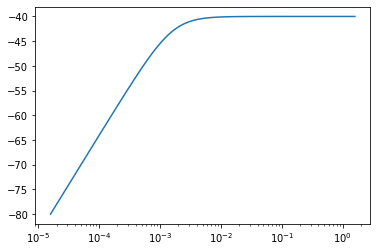

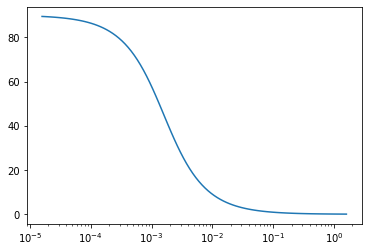

In [4]:
W, bode_mag, phase = signal.bode(transfer_func)
# преобразуем цикличиские частоты, выдаваемые bode, в обычные
fs = [0.5*w/math.pi for w in W]
plt.figure()
# изобразим графики в полулогарифмическом масштабе
plt.semilogx(fs, bode_mag)
plt.figure()
plt.semilogx(fs, phase)
plt.show()

### 4. Создайте модель в scipy.signal, описывающую систему. Значения констант следует для простоты принять равными небольшим целым числам.
### 5. Подавая на вход модели синусоидальный сигнал нескольких различных амплитуд, но с постоянной частотой, отследите реакцию модели (амплитуду и фазу выходного сигнала). Какой вывод можно сделать?

Taken w: 1.5915494309189535, mag: -40.000004342942646


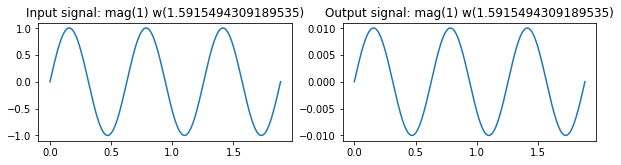

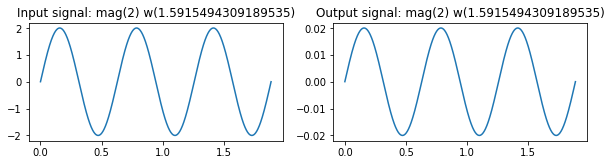

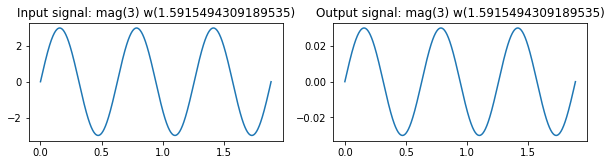

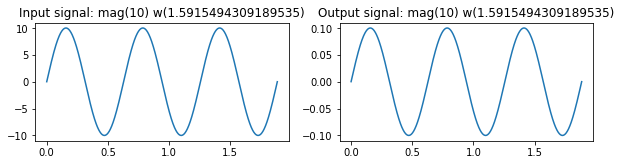

In [5]:
w = fs[-1]
T = np.linspace(0, 3.0/w, 1001)
mags = [1, 2, 3, 10]

# Распечатаем предполагаемое уменьшение амплитуды: -40db - мощность изменится в 10^-4 раз, а амплитуда --- в 10^-2 раз
print(f'Taken w: {w}, mag: {bode_mag[-1]}')

for i, mag in enumerate(mags, 1):
    S = [mag*math.sin(t*2*math.pi*w) for t in T]
    Tout, yout, xout = signal.lsim(transfer_func, S, T)

    # выведем входной и выходной сигналы
    f = plt.figure(figsize=(10,10))
    s1 = f.add_subplot(4, 2, 2*i-1, title=f'Input signal: mag({mag}) w({w})')
    s1.plot(T, S)
    s2 = f.add_subplot(4, 2, 2*i, title=f'Output signal: mag({mag}) w({w})')
    s2.plot(Tout, yout)

### 6. Подавая на вход модели синусоидальный сигнал нескольких различных частот, но с постоянной амплитудой, отследите реакцию модели (амплитуду и фазу выходного сигнала). Какой вывод можно сделать?

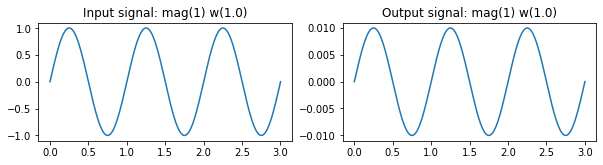

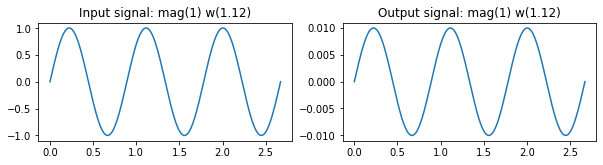

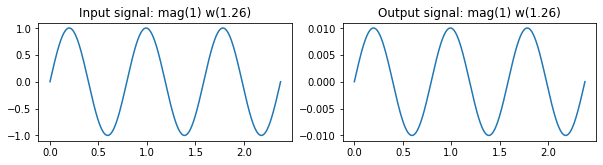

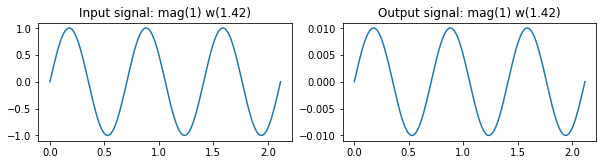

In [6]:
mag = 1
ws = fs[-5:-1]

for i, w in enumerate(ws, 1):
    T = np.linspace(0, 3.0/w, 1001)
    S = [mag*math.sin(t*2*math.pi*w) for t in T]
    Tout, yout, xout = signal.lsim(transfer_func, S, T)

    # выведем входной и выходной сигналы
    f = plt.figure(figsize=(10,10))
    s1 = f.add_subplot(4, 2, 2*i-1, title=f'Input signal: mag({mag}) w({round(w, 2)})')
    s1.plot(T, S)
    s2 = f.add_subplot(4, 2, 2*i, title=f'Output signal: mag({mag}) w({round(w, 2)})')
    s2.plot(Tout, yout)

### 7. Постройте графики частотных характеристик моделируемой системы. Оцените степень их совпадения с рассчитанным теоретически.

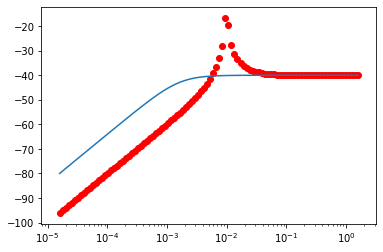

In [7]:
# A(ω) = |W(jω)|,φ(ω) = arg(W(jω))
# A(ω) = |jω/(1+a*jω)| =  ω*sqrt(a^2*ω^2 + 1)/(1-a^2*ω^2)

def bode(w):
    return np.abs(w * np.sqrt(np.square(a) * np.square(w) + 1) / (1 - np.square(a) * np.square(w)))

ws = np.array(fs[:])

A = [bode(w) for w in ws]

plt.semilogx(fs, bode_mag)
plt.scatter(ws, 20 * np.log10(A), c='r')